# Natural Language Processing

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3) # ignore the all double quates

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
dataset.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


## Cleaning the texts

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #inside the  brackets will be replaced by the spaces in the review column.
  review = review.lower() # return the review with only lowercase letters.
  review = review.split() # split the review into its different words so that then we can apply stemming to each of these words
  ps = PorterStemmer() # create an object
  all_stopwords = stopwords.words('english') # That will not include the "not" word from the Stop words.
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)] 
  review = ' '.join(review)
  corpus.append(review) # add the cleaned reviews into corpus. 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muratkucukosmanoglu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
 for i in range(0,5):
       print(corpus[i])

wow love place
crust not good
not tasti textur nasti
stop late may bank holiday rick steve recommend love
select menu great price


In [8]:
pd.DataFrame(corpus).tail()

,0
995,think food flavor textur lack
996,appetit instantli gone
997,overal not impress would not go back
998,whole experi underwhelm think go ninja sushi n...
999,wast enough life pour salt wound draw time too...


## Creating the Bag of Words model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) # 1500 most frequent words.
X = cv.fit_transform(corpus).toarray() # it will put all these words in different columns. matrixes of features has to be 2D array.
y = dataset.iloc[:, -1].values # dependent variable

In [10]:
len(X[0])

1500

In [11]:
df = pd.DataFrame(data=X,columns = cv.get_feature_names())
print(df)

     absolut  absolutley  accid  accommod  accomod  accordingli  account  ach  \
0          0           0      0         0        0            0        0    0   
1          0           0      0         0        0            0        0    0   
2          0           0      0         0        0            0        0    0   
3          0           0      0         0        0            0        0    0   
4          0           0      0         0        0            0        0    0   
..       ...         ...    ...       ...      ...          ...      ...  ...   
995        0           0      0         0        0            0        0    0   
996        0           0      0         0        0            0        0    0   
997        0           0      0         0        0            0        0    0   
998        0           0      0         0        0            0        0    0   
999        0           0      0         0        0            0        0    0   

     acknowledg  across  ..

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]

## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[80 37]
 [53 80]]


0.64

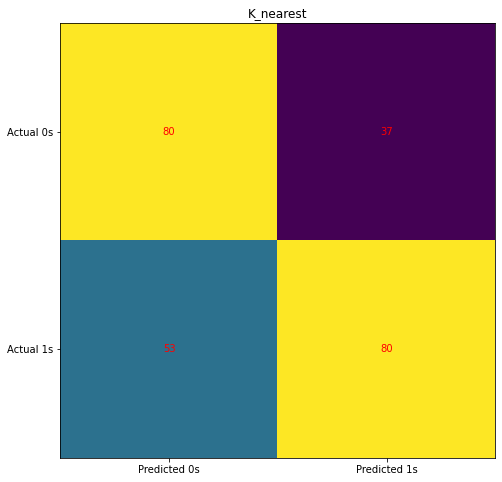

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.title('K_nearest')
plt.show()

# Predicting if a single review is positive or negative

In [18]:
new_review = 'Food was not good'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]
